In [1]:
%load_ext autoreload
%autoreload 2

import itertools
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool
import time
from tqdm import tqdm

from graph_generation import GenerateGraph
from models import GCN
from train import Trainer, Dataset
from embedding import Embedding
from experiments import train_take_embedding, plot_dim1, plot_dimN, plot_correlation_error, get_metrics
from config_valid import Config, TrainingMode
from plot_model import plot_model
from utils import plot_wo_outliers

import torch
from torch_geometric.loader import DataLoader
device = torch.device('cuda')

from scipy import stats

import yaml

# Regressione

## Distribuzione discreta - ultimo layer Denso

In [29]:
config_file = "configurations/regression1.yml"
config_c = Config(config_file)
gg = GenerateGraph(config_c)
dataset = gg.initialize_dataset()

Generating dataset...
Mean connectivity for each node: 14.969 p=0.05
Mean connectivity for each node: 89.709 p=0.3
Dataset generated


In [30]:
graph_embeddings_array, node_embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset)

GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 8)
    (1): GCNConv(8, 8)
  )
  (leakys): ModuleList(
    (0): LeakyReLU(negative_slope=0.03)
    (1): LeakyReLU(negative_slope=0.03)
  )
  (lin): Linear(in_features=8, out_features=1, bias=True)
  (mean_pool): MeanAggregation()
  (drop): Dropout(p=0.5, inplace=False)
)
MSELoss()
Loading Dataset...


100%|██████████████████████████████████████████████████████████| 600/600 [00:40<00:00, 14.65it/s]


Tempo impiegato: 41.05789136886597
tensor([0.0488], device='cuda:0') 420
tensor([0.3032], device='cuda:0') 180
runs/lr-0.01_epochs1800_bs150_neurons-1-8-8-1_08Aug_18-17-28
Run training for 1800 epochs
Before training Test loss: 0.00037878209518061744
Epoch: 0	Test loss: 0.00019399416115548876
Epoch: 100	Test loss: 0.0001322003909283214
Epoch: 200	Test loss: 9.820955391559336e-05
Epoch: 300	Test loss: 5.15702154694332e-05
Epoch: 400	Test loss: 3.5659552344845404e-05
Epoch: 500	Test loss: 2.8635503258556128e-05
Epoch: 600	Test loss: 1.8794025527313353e-05
Epoch: 700	Test loss: 1.3243720038897462e-05
Epoch: 800	Test loss: 1.5339994570240377e-05
Epoch: 900	Test loss: 1.8820417527523307e-05
Epoch: 1000	Test loss: 9.315473208617834e-06
Epoch: 1100	Test loss: 1.5242941056688627e-05
Epoch: 1200	Test loss: 1.6910690141634808e-05
Epoch: 1300	Test loss: 9.247755386038786e-06
Epoch: 1400	Test loss: 1.65863499407553e-05
Epoch: 1500	Test loss: 7.920821210265988e-06
Epoch: 1600	Test loss: 8.658902435

### Display the model

aten::new_zeros %index.13 : Long(45000, strides=[1], requires_grad=0, device=cuda:0) = aten::new_zeros(%519, %387, %388, %389, %390, %391) # /home/daniele/anaconda3/envs/pytorch-geom/lib/python3.8/site-packages/torch_geometric/nn/aggr/base.py:56:0



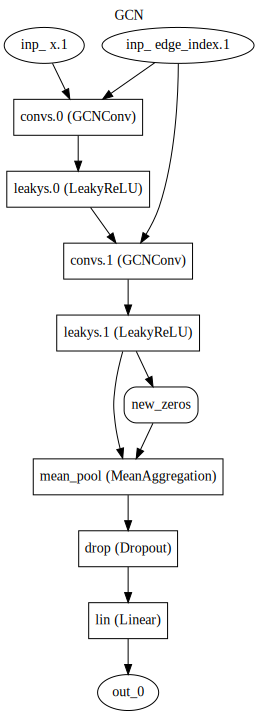

In [6]:
batch = trainer.dataset.sample_dummy_data()
d = plot_model(trainer.model, batch)
d

### Inspect Embedding feature arrays

In [31]:
graph_embeddings = Embedding(graph_embeddings_array, trainer.dataset, test_loss_list, config_c)

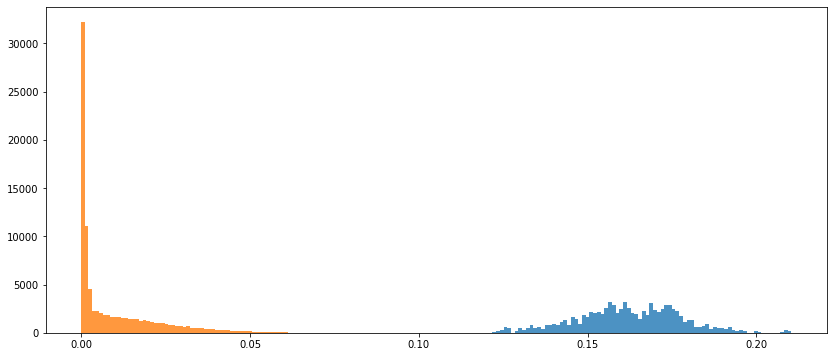

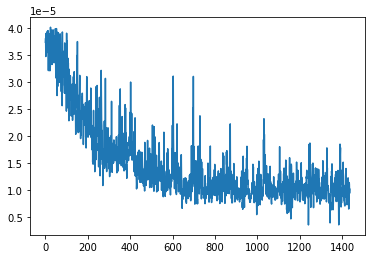

In [32]:
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(graph_embeddings, num_emb_neurons)
plt.plot(plot_wo_outliers(test_loss_list));

## Distribuzione discreta - senza ultimo layer Denso

In [26]:
config_file = "configurations/regression2.yml"
config_c = Config(config_file)
gg = GenerateGraph(config_c)
dataset = gg.initialize_dataset()
graph_embeddings_array, node_embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset)

Generating dataset...
Mean connectivity for each node: 14.914 p=0.05
Mean connectivity for each node: 89.664 p=0.3
Dataset generated
GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 8)
    (1): GCNConv(8, 1)
  )
  (leakys): ModuleList(
    (0): LeakyReLU(negative_slope=0.03)
    (1): LeakyReLU(negative_slope=0.03)
  )
  (mean_pool): MeanAggregation()
  (drop): Dropout(p=0.5, inplace=False)
)
MSELoss()
Loading Dataset...


100%|██████████████████████████████████████████████████████████| 600/600 [00:42<00:00, 14.05it/s]


Tempo impiegato: 42.79596781730652
tensor([0.0479], device='cuda:0') 420
tensor([0.3000], device='cuda:0') 180
runs/lr-0.01_epochs800_bs150_neurons-1-8-1_08Aug_18-12-53
Run training for 800 epochs
Before training Test loss: 0.0009149640384647582
Epoch: 0	Test loss: 0.000194348751877745
Epoch: 100	Test loss: 0.0001694448654436403
Epoch: 200	Test loss: 0.00016782953817811276
Epoch: 300	Test loss: 0.00016740881837904454
Epoch: 400	Test loss: 0.00016640570118195481
Epoch: 500	Test loss: 0.00015973905618819924
Epoch: 600	Test loss: 0.00011242367844614718
Epoch: 700	Test loss: 4.6563997036880914e-05
Epoch: 799	Test loss: 1.4455736769984165e-05 		 FINE TRAINING


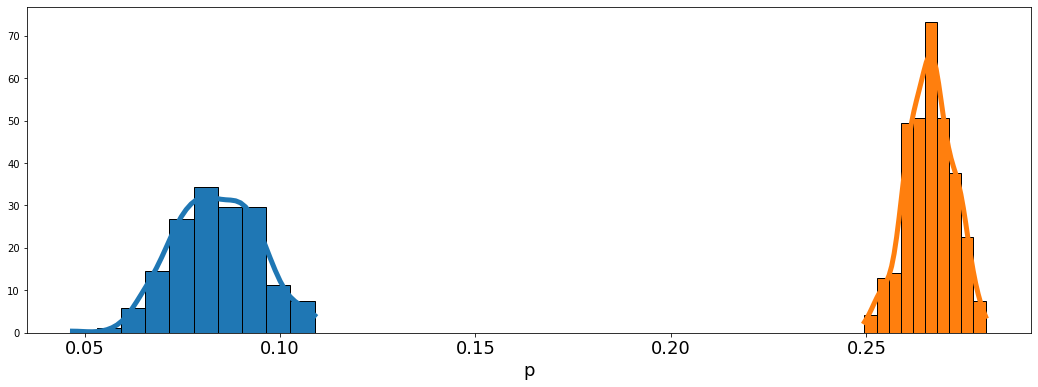

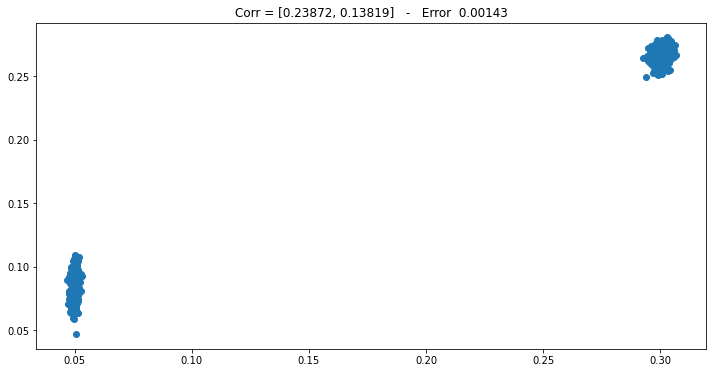

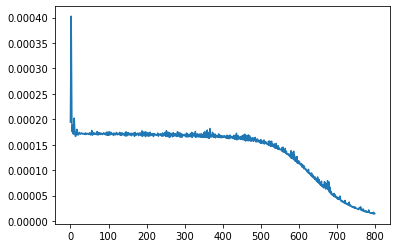

In [28]:
embeddings = Embedding(graph_embeddings_array, trainer.dataset, test_loss_list, config_c)
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(embeddings, num_emb_neurons)
plt.plot(test_loss_list);

## Distribuzione continua - ultimo layer Denso

In [34]:
config_file = "configurations/regression3.yml"
config_c = Config(config_file)
gg = GenerateGraph(config_c)
dataset = gg.initialize_dataset()

Generating dataset...
Dataset generated


In [35]:
graph_embeddings_array, node_embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset)

GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 16)
    (1): GCNConv(16, 8)
  )
  (leakys): ModuleList(
    (0): LeakyReLU(negative_slope=0.03)
    (1): LeakyReLU(negative_slope=0.03)
  )
  (lin): Linear(in_features=8, out_features=1, bias=True)
  (mean_pool): MeanAggregation()
  (drop): Dropout(p=0.5, inplace=False)
)
MSELoss()
Loading Dataset...


100%|████████████████████████████████████████████████████████| 1000/1000 [02:04<00:00,  8.02it/s]


Tempo impiegato: 124.98785591125488
tensor([0.3179], device='cuda:0') 700
tensor([0.3434], device='cuda:0') 300
runs/lr-0.01_epochs8000_bs150_neurons-1-16-8-1_08Aug_18-24-16
Run training for 8000 epochs
Before training Test loss: 0.0003394488245248795
Epoch: 0	Test loss: 0.0001703674780825774
Epoch: 100	Test loss: 0.00016979861383636791
Epoch: 200	Test loss: 0.00016966513047615687
Epoch: 300	Test loss: 0.00016964263593157133
Epoch: 400	Test loss: 0.00016964194054404895
Epoch: 500	Test loss: 0.00016965921347339948
Epoch: 600	Test loss: 0.00016962862263123196
Epoch: 700	Test loss: 0.00016976096977790197
Epoch: 800	Test loss: 0.00016962121551235518
Epoch: 900	Test loss: 0.00016972010334332784
Epoch: 1000	Test loss: 0.00016962394118309022
Epoch: 1100	Test loss: 0.00016964565341671308
Epoch: 1200	Test loss: 0.00016976361473401388
Epoch: 1300	Test loss: 0.00016981060927112897
Epoch: 1400	Test loss: 0.00016966581965486207
Epoch: 1500	Test loss: 0.00016962969675660133
Epoch: 1600	Test loss: 0.

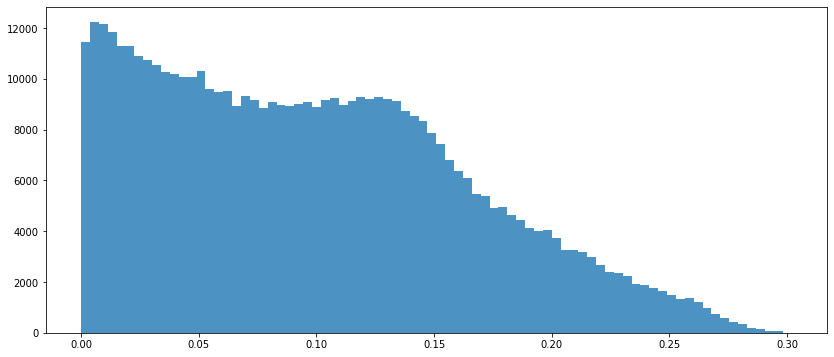

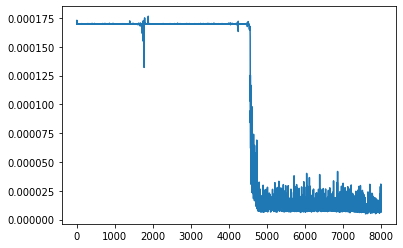

In [38]:
embeddings = Embedding(graph_embeddings_array, trainer.dataset, test_loss_list, config_c)
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(embeddings, num_emb_neurons)
plt.plot(test_loss_list);

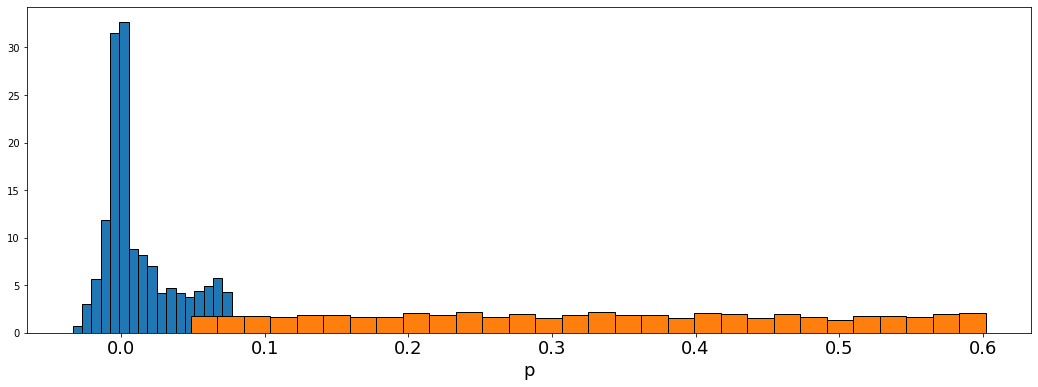

In [39]:
emb = embeddings.embeddings_array.flatten()
lab = embeddings.embedding_labels
plot_dim1([emb, lab], bins=30, want_kde=False)

## Distribuzione continua - senza ultimo layer Denso

In [41]:
config_file = "configurations/regression4.yml"
config_c = Config(config_file)
gg = GenerateGraph(config_c)
dataset = gg.initialize_dataset()
graph_embeddings_array, node_embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset)

Generating dataset...
Dataset generated
GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 8)
    (1): GCNConv(8, 1)
  )
  (leakys): ModuleList(
    (0): LeakyReLU(negative_slope=0.03)
    (1): LeakyReLU(negative_slope=0.03)
  )
  (mean_pool): MeanAggregation()
  (drop): Dropout(p=0.5, inplace=False)
)
MSELoss()
Loading Dataset...


100%|████████████████████████████████████████████████████████| 1000/1000 [02:05<00:00,  7.98it/s]


Tempo impiegato: 125.53641152381897
tensor([0.0849], device='cuda:0') 700
tensor([0.0892], device='cuda:0') 300
runs/lr-0.01_epochs1800_bs150_neurons-1-8-1_08Aug_19-28-37
Run training for 1800 epochs
Before training Test loss: 0.0009014735122521719
Epoch: 0	Test loss: 0.0008658906817436219
Epoch: 100	Test loss: 0.00016301529482007026
Epoch: 200	Test loss: 0.00015946789955099424
Epoch: 300	Test loss: 0.00014140487338105837
Epoch: 400	Test loss: 9.639277743796507e-05
Epoch: 500	Test loss: 5.255086192240318e-05
Epoch: 600	Test loss: 2.726337251563867e-05
Epoch: 700	Test loss: 1.9522247991214197e-05
Epoch: 800	Test loss: 1.750649729122718e-05
Epoch: 900	Test loss: 9.611758093039195e-06
Epoch: 1000	Test loss: 1.0637998736153046e-05
Epoch: 1100	Test loss: 8.37623723782599e-06
Epoch: 1200	Test loss: 8.564145925144355e-06
Epoch: 1300	Test loss: 1.0801479608441392e-05
Epoch: 1400	Test loss: 8.319444799174865e-06
Epoch: 1500	Test loss: 8.01539048552513e-06
Epoch: 1600	Test loss: 9.71487451655169

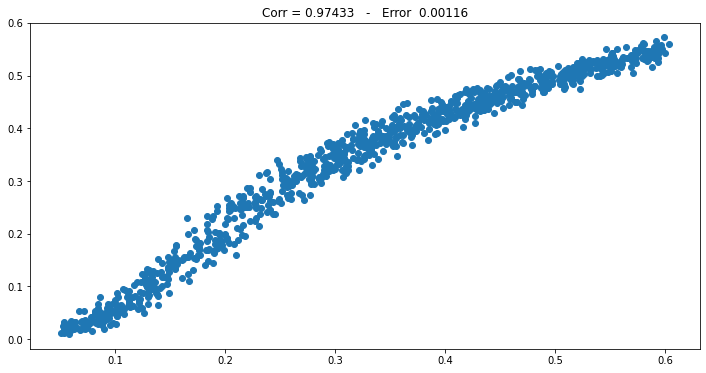

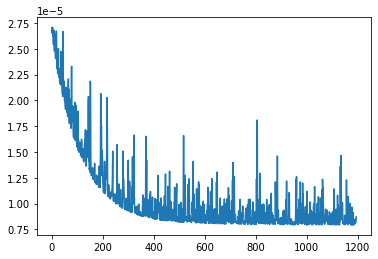

In [43]:
embeddings = Embedding(graph_embeddings_array, trainer.dataset, test_loss_list, config_c)
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(embeddings, num_emb_neurons)
plt.plot(plot_wo_outliers(test_loss_list));

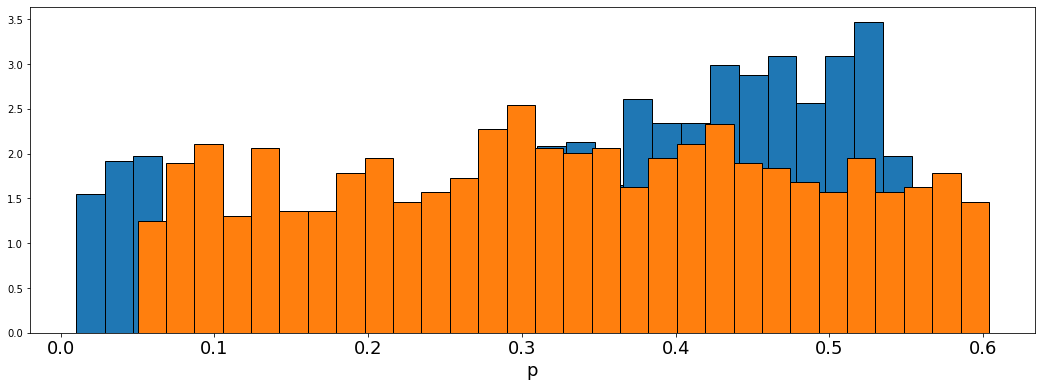

In [44]:
emb = embeddings.embeddings_array.flatten()
lab = embeddings.embedding_labels
plot_dim1([emb, lab], bins=30, want_kde=False)

# Classificazione

## ultimo layer Denso

In [47]:
config_file = "configurations/classification1.yml"
config_c = Config(config_file)
gg = GenerateGraph(config_c)
dataset = gg.initialize_dataset()
graph_embeddings_array, node_embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset)

Generating dataset...
Mean connectivity for each node: 14.934 p=0.05
Mean connectivity for each node: 89.797 p=0.3
Dataset generated
GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 8)
  )
  (leakys): ModuleList(
    (0): LeakyReLU(negative_slope=0.03)
  )
  (lin): Linear(in_features=8, out_features=2, bias=True)
  (mean_pool): MeanAggregation()
  (drop): Dropout(p=0.5, inplace=False)
)
CrossEntropyLoss()
Loading Dataset...


  0%|                                                                    | 0/600 [00:00<?, ?it/s]/home/daniele/Documenti/Progetti/Networks/Embednet/train.py:276: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/torch/csrc/utils/tensor_new.cpp:210.)
  pyg_graph.y = torch.tensor([type_graph], dtype=tipo)
100%|██████████████████████████████████████████████████████████| 600/600 [00:40<00:00, 14.65it/s]


Tempo impiegato: 41.050167083740234
tensor([[0., 1.]], device='cuda:0') 420
tensor([[1., 0.]], device='cuda:0') 180
runs/lr-0.01_epochs2500_bs150_neurons-1-8-2_09Aug_01-25-37
Run training for 2500 epochs
Before training Test loss: 0.007694107625219557
Epoch: 0	Test loss: 0.007694281472100152
Epoch: 100	Test loss: 0.007463736004299588
Epoch: 200	Test loss: 0.006609639194276598
Epoch: 300	Test loss: 0.005652695894241333
Epoch: 400	Test loss: 0.003515618211693234
Epoch: 500	Test loss: 0.002389904277192222
Epoch: 600	Test loss: 0.0015362982120778826
Epoch: 700	Test loss: 0.0011744572884506649
Epoch: 800	Test loss: 0.0008271076613002354
Epoch: 900	Test loss: 0.0007463670025269191
Epoch: 1000	Test loss: 0.0006423784626854791
Epoch: 1100	Test loss: 0.0005290369399719769
Epoch: 1200	Test loss: 0.00047874067806535296
Epoch: 1300	Test loss: 0.0003916565121875869
Epoch: 1400	Test loss: 0.0003825799251596133
Epoch: 1500	Test loss: 0.00029614750916759174
Epoch: 1600	Test loss: 0.0002653032541275024

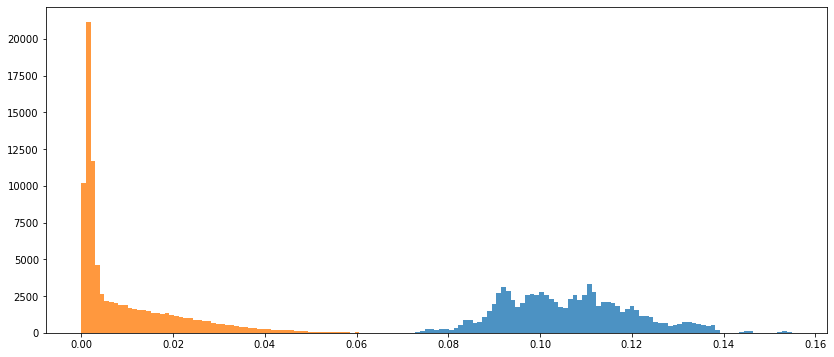

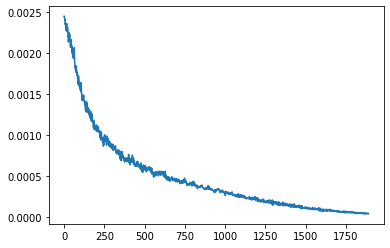

In [54]:
embeddings = Embedding(graph_embeddings_array, trainer.dataset, test_loss_list, config_c)
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(embeddings, num_emb_neurons)
plt.plot(plot_wo_outliers(test_loss_list));

## senza ultimo layer Denso

In [3]:
config_file = "configurations/classification2.yml"
config_c = Config(config_file)
gg = GenerateGraph(config_c)
dataset = gg.initialize_dataset()
graph_embeddings_array, node_embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset)

Generating dataset...
Mean connectivity for each node: 14.922 p=0.05
Mean connectivity for each node: 89.726 p=0.3
Dataset generated
GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 8)
    (1): GCNConv(8, 2)
  )
  (leakys): ModuleList(
    (0): LeakyReLU(negative_slope=0.03)
    (1): LeakyReLU(negative_slope=0.03)
  )
  (mean_pool): MeanAggregation()
  (drop): Dropout(p=0.5, inplace=False)
)
CrossEntropyLoss()
Loading Dataset...


  0%|                                                                    | 0/600 [00:00<?, ?it/s]/home/daniele/Documenti/Progetti/Networks/Embednet/train.py:276: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/torch/csrc/utils/tensor_new.cpp:210.)
  pyg_graph.y = torch.tensor([type_graph], dtype=tipo)
100%|██████████████████████████████████████████████████████████| 600/600 [00:41<00:00, 14.57it/s]


Tempo impiegato: 41.291216135025024
tensor([[1., 0.]], device='cuda:0') 420
tensor([[0., 1.]], device='cuda:0') 180
runs/lr-0.01_epochs2500_bs150_neurons-1-8-2_09Aug_17-36-25
Run training for 2500 epochs
Before training Test loss: 0.007653781771659851
Epoch: 0	Test loss: 0.007680490944120619
Epoch: 100	Test loss: 0.007671859529283311
Epoch: 200	Test loss: 0.007650390598509047
Epoch: 300	Test loss: 0.007675682504971822
Epoch: 400	Test loss: 0.007666135496563382
Epoch: 500	Test loss: 0.007637616329722935
Epoch: 600	Test loss: 0.0076226555638843115
Epoch: 700	Test loss: 0.007563628090752496
Epoch: 800	Test loss: 0.007018288969993592
Epoch: 900	Test loss: 0.005598360631201002
Epoch: 1000	Test loss: 0.003948433531655205
Epoch: 1100	Test loss: 0.002724183847506841
Epoch: 1200	Test loss: 0.0019149724808004167
Epoch: 1300	Test loss: 0.0013291652417845197
Epoch: 1400	Test loss: 0.0009784135967493058
Epoch: 1500	Test loss: 0.0007174392127328448
Epoch: 1600	Test loss: 0.000544132540623347
Epoch: 

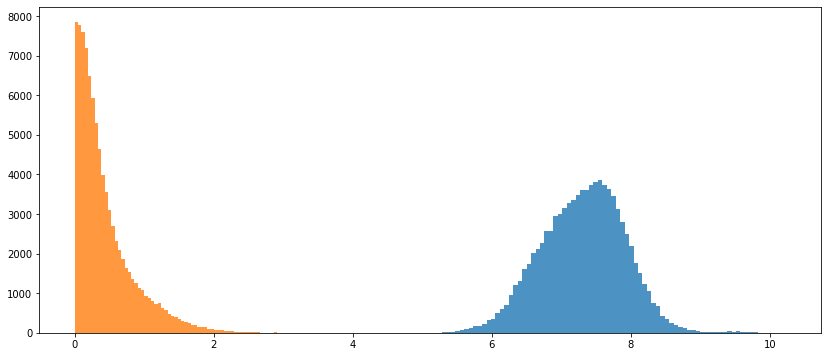

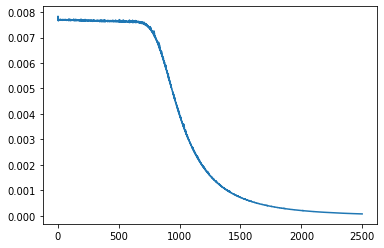

In [5]:
embeddings = Embedding(graph_embeddings_array, trainer.dataset, test_loss_list, config_c)
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(embeddings, num_emb_neurons)
plt.plot(plot_wo_outliers(test_loss_list));

In [1]:
embeddings.embeddings_array.shape

NameError: name 'embeddings' is not defined

# Vedo cosa fa su altri grafi che non ha mai visto, con p diversa

In [ ]:
config['graph_dataset']['list_p'] = [0.03, 0.2]
dataset_grafi_nx, dataset_labels, list_p = dataset_nclass_ER(config)
trainer.load_dataset(dataset_grafi_nx, dataset_labels)
whole_data = trainer.dataset.dataset_pyg
all_data_loader = DataLoader(whole_data, batch_size=trainer.dataset.bs, shuffle=False) 
embeddings_array2 = trainer.take_embedding(all_data_loader)
embeddings_array2 = np.array([emb.cpu().detach().numpy() for emb in embeddings_array2])

embeddings2 = Embedding(embeddings_array2, trainer.dataset.dataset, trainer.dataset.labels, list_p)

In [ ]:
plt.figure(figsize=(18, 4))
h,e = np.histogram(embeddings2.embeddings_array.flatten(), bins=30, density=False)
x = np.linspace(e.min(), e.max())
plt.bar(e[:-1], h, width=np.diff(e), ec='k', align='edge', label='histogram')

In [ ]:
actual_p2 = np.array([nx.to_numpy_matrix(t).sum(axis=1).mean() / (num_nodes-1) for t in trainer.dataset.dataset])
for p in list_p:
    mask_int = np.argwhere(intorno(p, embeddings2.embedding_labels, 0.15)).flatten()
    plt.scatter(actual_p2[mask_int], embeddings2.embeddings_array[mask_int].flatten()) #, s=area, c=colors, alpha=0.5)
    # correlazione tra target e prediction
    correlaz = np.corrcoef(embeddings2.embeddings_array[mask_int].flatten(), actual_p2[mask_int])[0,1]
    plt.title(f"P = {p}     corr = {correlaz}")
    plt.show()